<a href="https://colab.research.google.com/github/nirmal428/MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression


Simple Linear Regression is a statistical method used to model the relationship between two variables:

Independent variable (X) – predictor/input

Dependent variable (Y) – response/output

It assumes a linear relationship between X and Y and fits a straight line to predict Y based on X.

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DataLink - https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset

In [300]:
df=pd.read_csv("/content/SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [301]:
df.shape

(25000, 3)

In [302]:
df.drop('Index',axis=1,inplace=True)

In [303]:
row_to_delete=range(50,25000)

In [304]:
df.head(12)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
5,68.69784,123.3024
6,69.80204,141.4947
7,70.01472,136.4623
8,67.90265,112.3723
9,66.78236,120.6672


In [305]:
df=df.drop(row_to_delete)

In [306]:
df.head(15)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
5,68.69784,123.3024
6,69.80204,141.4947
7,70.01472,136.4623
8,67.90265,112.3723
9,66.78236,120.6672


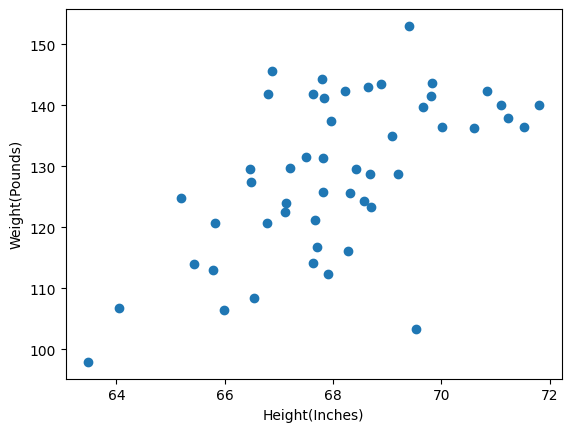

In [307]:
plt.scatter(df['Height(Inches)'],df['Weight(Pounds)'])
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.show()

In [308]:
# divide our dataset into independent and dependent
x=df['Height(Inches)']
y=df['Weight(Pounds)']

In [309]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [310]:
x.shape

(50,)

In [311]:
x_test.shape , x_train.shape

((10,), (40,))

In [312]:
y_test.shape , y_train.shape

((10,), (40,))

In [313]:
# standadize the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [314]:
scaler=StandardScaler()

In [315]:
x_train=scaler.fit_transform(x_train.values.reshape(-1,1))

In [316]:
x_test=scaler.transform(x_test.values.reshape(-1,1))  #in transforms z_score get applied

In [317]:
## train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [318]:
slr=LinearRegression()

In [319]:
slr.fit(x_train,y_train)

LinearRegression()

In [320]:
print("the slope or coefficient of weigth is ",slr.coef_)
print("the intercept or bias of weigth is ",slr.intercept_)

the slope or coefficient of weigth is  [7.58799312]
the intercept or bias of weigth is  129.30829524999993


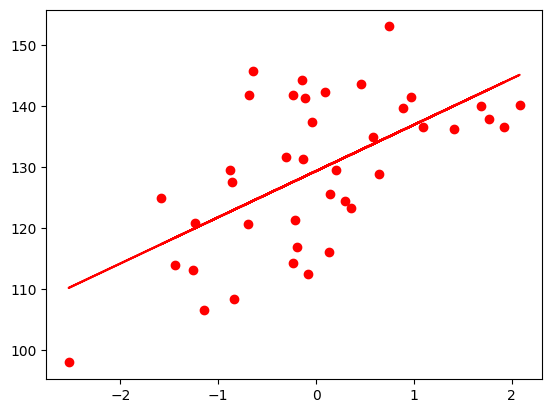

In [321]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,slr.predict(x_train),'r')

In [322]:
y_pred_test=slr.predict(x_test)

In [323]:
y_pred_test,y_test

(array([125.40854685, 112.51245414, 135.51451231, 131.94193843,
        131.84443703, 136.76527639, 141.05323845, 125.79519323,
        128.34677378, 125.46993662]),
 13    122.4618
 39    106.7115
 30    103.3016
 45    128.7639
 17    142.9733
 48    143.6215
 26    142.4235
 25    129.7244
 32    125.7886
 19    124.0449
 Name: Weight(Pounds), dtype: float64)

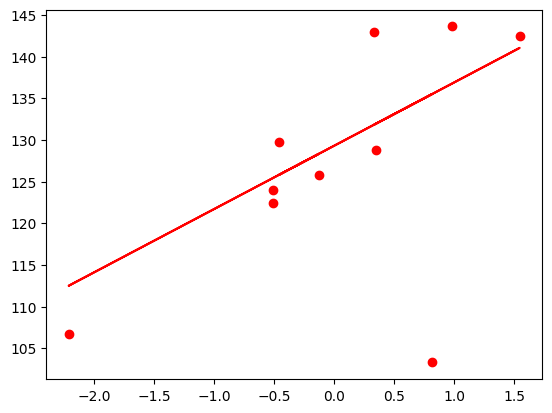

In [324]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,slr.predict(x_test),'r')

Performanc Matrics

 MSE,MAE,RMSE

 R square ,adjusted R square

In [325]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [326]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt( mse)
print(mse)
print(mae)
print(rmse)

128.68566921280973
7.14064170485922
11.343970610540637


In [327]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.27861438263756044


In [328]:
slr

LinearRegression()

In [329]:
## new datapoint weight is 154
scaled_weight=scaler.transform([[154]])
scaled_weight

array([[47.56542714]])

In [330]:
slr.predict([scaled_weight[0]])

array([490.23442893])

# Multiple Linear Regression

Multiple Linear Regression (MLR) is an extension of simple linear regression that models the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, ...).Multiple Linear Regression (MLR) is an extension of simple linear regression that models the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, ...).

Equation


𝑌
=
𝑏
0
+
𝑏
1
𝑋
1
+
𝑏
2
𝑋
2
+
𝑏
3
𝑋
3
+
⋯
+
𝑏
𝑛
𝑋
𝑛

	​


In [331]:
from sklearn.datasets import fetch_california_housing

In [332]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [333]:
california=fetch_california_housing()

In [334]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [335]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [336]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [337]:
california.data.shape

(20640, 8)

In [338]:
california.target_names

['MedHouseVal']

In [339]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [340]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [341]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [342]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [343]:
dataset['Price']=california.target

In [344]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [345]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [346]:
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [347]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

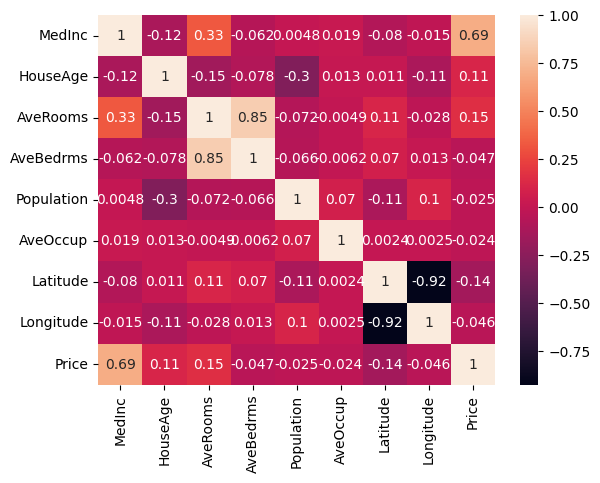

In [348]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [349]:
#insdependent and dependent feature
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [350]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [351]:
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [353]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [356]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [357]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [358]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [359]:
x_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [360]:
# Model Training
from sklearn.linear_model import LinearRegression

In [361]:
regression=LinearRegression()

In [362]:
regression.fit(x_train_scaled,y_train)

LinearRegression()

In [364]:
regression.coef_

array([ 0.85438303,  0.12254624, -0.29441013,  0.33925949, -0.00230772,
       -0.0408291 , -0.89692888, -0.86984178])

In [365]:
regression.intercept_

np.float64(2.0719469373788777)

In [366]:
# prediction
y_pred_test=regression.predict(x_test_scaled)

In [367]:
y_pred_test

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [368]:
#performance metrics cost function

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.5332001304956565
0.5558915986952442
0.7455813830127763


In [370]:
# R square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.575787706032451


In [371]:
#adjusted R square
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.574963792861356

# Pickling

Pickling in Machine Learning refers to the process of saving (serializing) a trained machine learning model or Python object into a file, so it can be reused later without retraining

In [374]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regression,open('regressor.pkl','wb'))

In [375]:
model_regressor=pickle.load(open('regressor.pkl','rb'))
model_regressor.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([73.49053637, 75.50450955, 80.16995219, ..., 80.13998083,
       75.89436733, 74.62812135])

In [376]:
standard_scaler=pickle.load(open('scaler.pkl','rb'))

In [378]:
model_regressor.predict(standard_scaler.transform(x_test))

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])